# Analyze Model Results

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from MemoryAutoScaling import analysis

pd.set_option('display.max_columns', None)

In [2]:
def build_model_result_CDFs(model_results_df, model_name):
    """Builds CDFs of model result statistics for `model_name` from `model_results_df`.
    
    The CDFs are built for each model result statistic across all the traces modeled.
    
    Parameters
    ----------
    model_results_df: pd.DataFrame
        A pandas DataFrame containing the model results for all traces.
    model_name: str
        A string representing the name of the model fit to the traces.
    
    Returns
    -------
    None
    
    """
    fig, axes = plt.subplots(2, 2, figsize=(20, 20))
    colors = ["blue", "black", "green", "red"]
    col_lst = ["test_mase", "under_mase", "prop_under_preds", "max_under_pred"]
    for idx in range(len(colors)):
        col_name = "{0}_{1}".format(col_lst[idx], model_name)
        data_vals = model_results_df[col_name].values
        row = idx // 2
        col = idx % 2
        analysis.plot_cumulative_distribution_function(data_vals, axes[row, col], col_name, colors[idx], "CDF")

In [3]:
def get_model_results(data_dir, model_name):
    """Retrieves the model results for `model_name` from `data_dir`.
    
    Parameters
    ----------
    data_dir: str
        A string representing the directory containing the model results.
    model_name: str
        A string representing the name of the model for which results are retrieved.
    
    Returns
    -------
    pd.DataFrame
        A pandas DataFrame containing the model results.
    
    """
    model_df = pd.read_csv(os.path.join(data_dir, "{}_results.csv".format(model_name)))
    print(model_df.describe())
    build_model_result_CDFs(model_df, model_name)
    return model_df

### Maximum Memory Usage - 3 Period Aggregation

                 id  train_mase_ma  test_mase_ma  under_mase_ma  \
count  2.953000e+03   2.953000e+03   2953.000000    2953.000000   
mean   3.794038e+11   3.025193e+00      1.622755       0.646675   
std    5.440220e+10   1.357939e+01      7.358800       2.550787   
min    1.950000e+02   2.384186e-07      0.000000       0.000000   
25%    3.810628e+11   9.933862e-01      0.766636       0.273579   
50%    3.840804e+11   1.185640e+00      0.878648       0.423427   
75%    3.957300e+11   1.957063e+00      0.986150       0.502611   
max    4.004577e+11   4.130000e+02    232.333333      71.000000   

       prop_under_preds_ma  max_under_pred_ma  over_mase_ma  \
count          2953.000000        2751.000000   2953.000000   
mean              0.467731          19.982662      0.646675   
std               0.210665          75.910285      2.550787   
min               0.000000           0.000305      0.000000   
25%               0.378378           0.150356      0.273579   
50%               

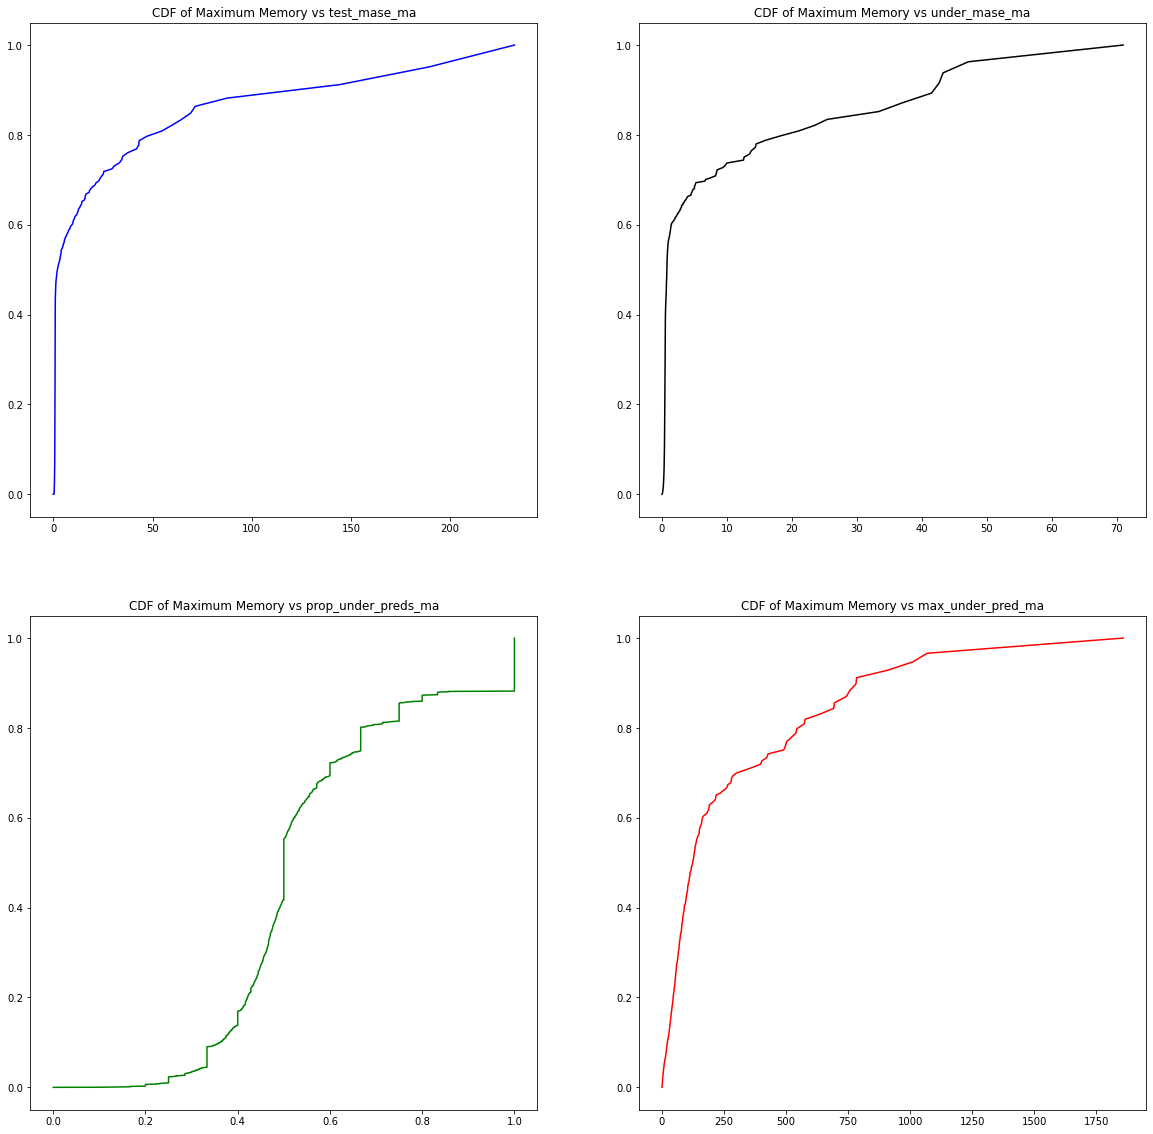

In [4]:
max_mem_3_dir = "/Users/mattb/Desktop/Courses/MemoryAutoScaling/output_data/max_mem_3"

ma_df = get_model_results(max_mem_3_dir, "ma")

                 id  train_mase_es  test_mase_es  under_mase_es  \
count  2.953000e+03    2953.000000  2.953000e+03    2953.000000   
mean   3.794038e+11       2.523847  1.643266e+00       0.533418   
std    5.440220e+10      13.966940  7.845703e+00       1.885358   
min    1.950000e+02       0.000106  9.059906e-08       0.000000   
25%    3.810628e+11       0.956072  7.752750e-01       0.222533   
50%    3.840804e+11       1.093519  8.831796e-01       0.404232   
75%    3.957300e+11       1.572019  9.816800e-01       0.486779   
max    4.004577e+11     523.788000  2.505455e+02      48.725167   

       prop_under_preds_es  max_under_pred_es  over_mase_es  \
count          2953.000000        2711.000000   2953.000000   
mean              0.452068          12.992409      0.533418   
std               0.216546          53.787649      1.885358   
min               0.000000           0.000121      0.000000   
25%               0.333333           0.138211      0.222533   
50%               

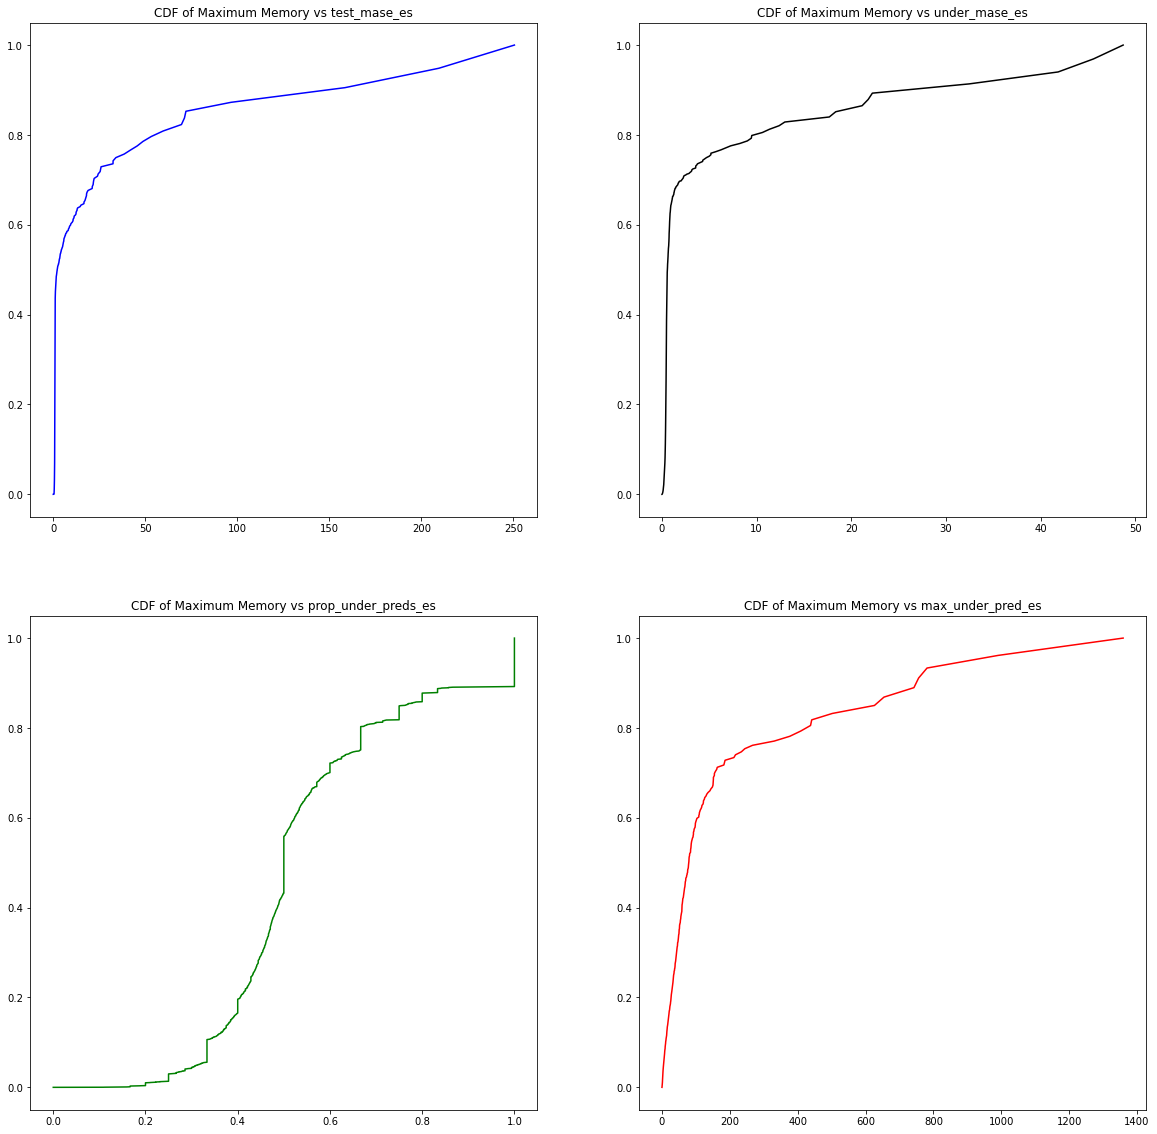

In [5]:
es_df = get_model_results(max_mem_3_dir, "es")

                 id  train_mase_reg  test_mase_reg  under_mase_reg  \
count  2.953000e+03     2647.000000   2.545000e+03     2545.000000   
mean   3.794038e+11        0.830329   9.043002e+00        1.323750   
std    5.440220e+10        0.706111   1.078567e+02       11.478812   
min    1.950000e+02        0.000000   4.283670e-07        0.000000   
25%    3.810628e+11        0.499951   9.065205e-01        0.091259   
50%    3.840804e+11        0.852822   1.220034e+00        0.360278   
75%    3.957300e+11        1.066116   2.035745e+00        0.620446   
max    4.004577e+11       13.051773   4.448080e+03      448.682181   

       prop_under_preds_reg  max_under_pred_reg  over_mase_reg  \
count           2781.000000         2319.000000    2545.000000   
mean               0.397976           16.718209       1.323750   
std                0.310747          100.219155      11.478812   
min                0.000000            0.000021       0.000000   
25%                0.138286            

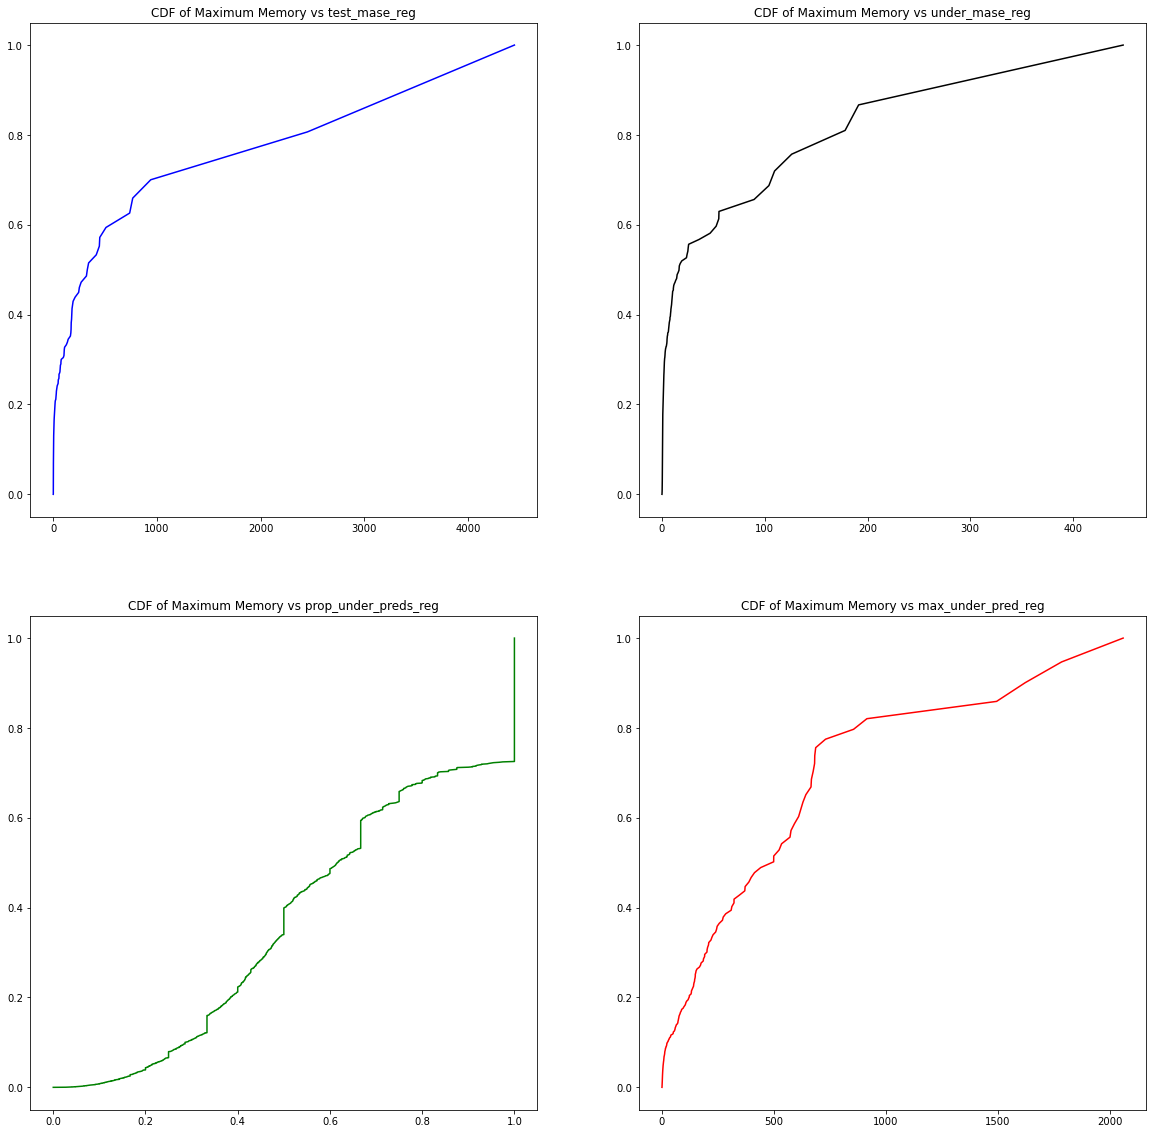

In [6]:
reg_df = get_model_results(max_mem_3_dir, "reg")

                 id  train_mase_svm  test_mase_svm  under_mase_svm  \
count  2.953000e+03     2647.000000    2545.000000     2545.000000   
mean   3.794038e+11        3.178774      23.273902        2.098904   
std    5.440220e+10        6.550203     317.650472       14.073785   
min    1.950000e+02        0.000000       0.000001        0.000000   
25%    3.810628e+11        1.089806       1.214628        0.004819   
50%    3.840804e+11        1.928239       2.209247        0.264631   
75%    3.957300e+11        3.322070       5.362367        0.856432   
max    4.004577e+11      158.195574   13836.250514      527.166667   

       prop_under_preds_svm  max_under_pred_svm  over_mase_svm  \
count           2781.000000        2.071000e+03    2545.000000   
mean               0.368871        9.093789e-01       2.098904   
std                0.365297        1.361105e+01      14.073785   
min                0.000000        1.476452e-16       0.000000   
25%                0.000000        2.20

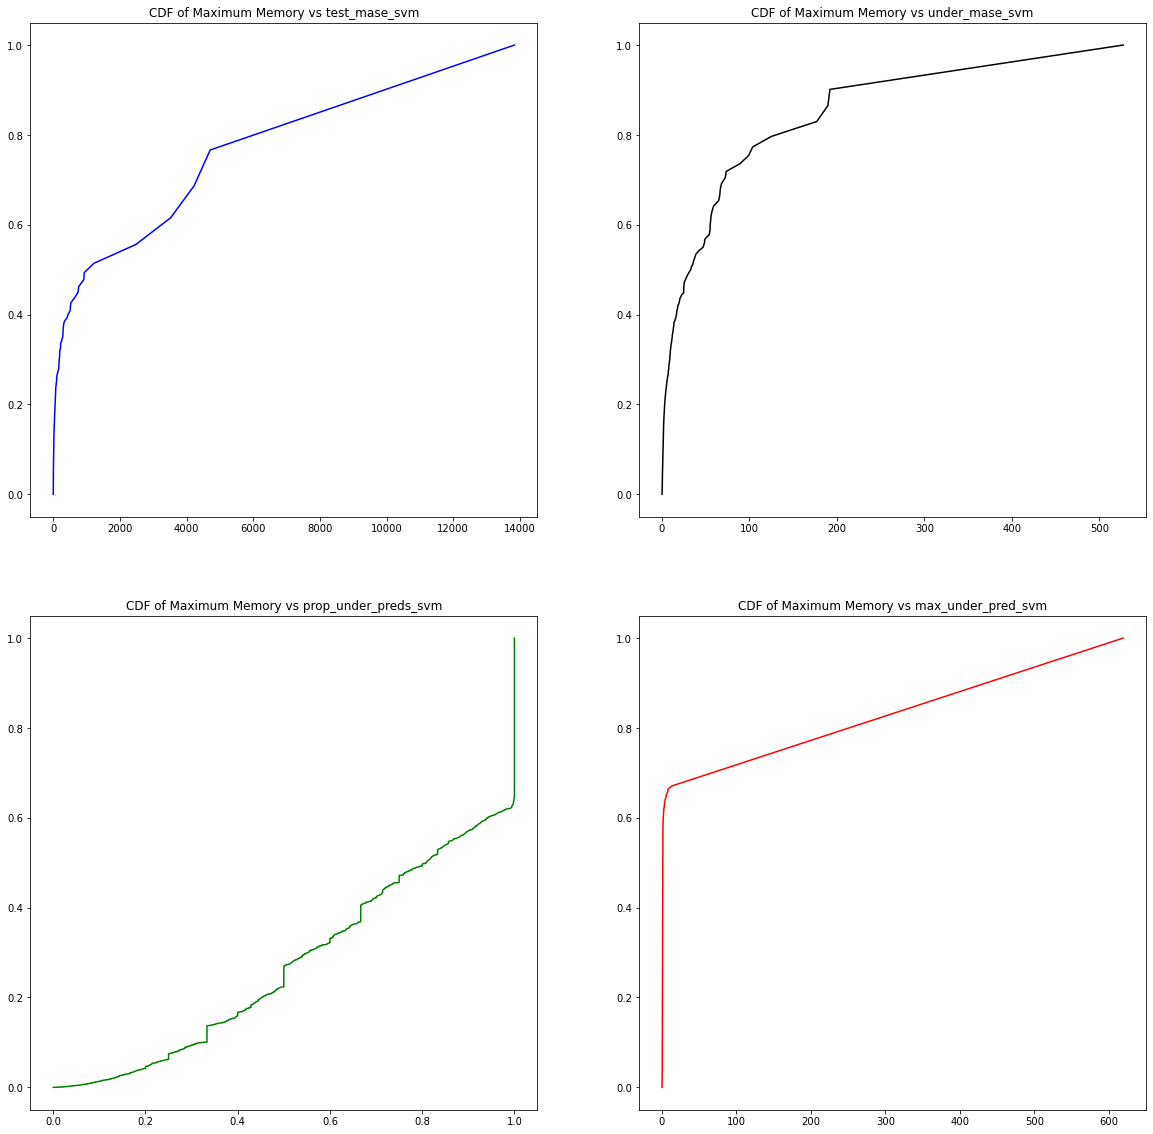

In [7]:
svm_df = get_model_results(max_mem_3_dir, "svm")